In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    20426 non-null  object 
 1   league    20426 non-null  object 
 2   name      20426 non-null  object 
 3   age       20426 non-null  int64  
 4   Apps      20426 non-null  object 
 5   Mins      20426 non-null  int64  
 6   Tackles   20426 non-null  object 
 7   Inter     20426 non-null  object 
 8   Fouls     20426 non-null  object 
 9   Offsides  20426 non-null  object 
 10  Clear     20426 non-null  object 
 11  Drb       20426 non-null  object 
 12  Blocks    20426 non-null  object 
 13  OwnG      20426 non-null  object 
 14  Goals     20426 non-null  object 
 15  Assists   20426 non-null  object 
 16  SpG       20426 non-null  object 
 17  KeyP      20426 non-null  object 
 18  Drb.1     20426 non-null  object 
 19  Fouled    20426 non-null  object 
 20  Off       20426 non-null  ob

In [4]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,29):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    20426 non-null  object 
 1   league    20426 non-null  object 
 2   name      20426 non-null  object 
 3   age       20426 non-null  int64  
 4   Apps      20426 non-null  object 
 5   Mins      20426 non-null  int64  
 6   Tackles   20426 non-null  float64
 7   Inter     20426 non-null  float64
 8   Fouls     20426 non-null  float64
 9   Offsides  20426 non-null  float64
 10  Clear     20426 non-null  float64
 11  Drb       20426 non-null  float64
 12  Blocks    20426 non-null  float64
 13  OwnG      20426 non-null  int64  
 14  Goals     20426 non-null  int64  
 15  Assists   20426 non-null  int64  
 16  SpG       20426 non-null  float64
 17  KeyP      20426 non-null  float64
 18  Drb.1     20426 non-null  float64
 19  Fouled    20426 non-null  float64
 20  Off       20426 non-null  fl

In [5]:
df.head()

,season,league,name,age,Apps,Mins,Tackles,Inter,Fouls,Offsides,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2019-2020,ItalySerieA,Cristiano Ronaldo Juventus,36,33,2919,0.4,0.2,0.8,0.0,...,1.8,0.9,1.0,2.2,36.5,85.1,0.2,0.9,0.0,7.82
1,2019-2020,ItalySerieA,Josip Ilicic Atalanta,33,21(5),1673,1.0,0.3,0.4,0.0,...,2.3,0.1,1.8,2.0,34.6,81.9,0.7,1.8,0.3,7.65
2,2019-2020,ItalySerieA,Ciro Immobile Lazio,31,36(1),3176,0.2,0.3,1.0,0.0,...,1.0,0.6,0.8,2.6,23.9,77.0,0.0,0.9,0.1,7.57
3,2019-2020,ItalySerieA,Luis Alberto Lazio,29,36,3122,1.4,0.6,0.6,0.0,...,1.1,0.0,1.3,1.4,57.6,83.5,1.2,3.1,0.4,7.55
4,2019-2020,ItalySerieA,Papu Gómez Atalanta,33,34(2),2861,0.8,0.5,0.5,0.0,...,2.1,0.1,1.1,1.6,47.8,85.3,1.8,2.1,0.1,7.55


In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mins_cut = df["Mins"] > 900
df = df[mins_cut]
df = df.dropna()
df_last = df

df_train, df_test = train_test_split(df, random_state=13)

df_sub = df_train.iloc[:,[0,1,2,4]]
df_sub_test = df_test.iloc[:,[0,1,2,4]]

df_train = df_train.drop(["season","league","name","Apps"], axis=1)
df_test = df_test.drop(["season","league","name","Apps"], axis=1)

standard_scaler = StandardScaler()
#from sklearn.preprocessing import StandardScaler
#사용시 train 데이터는 fit_transform / test 데이터는 transform
#해당 fit을 사용한 객체 자체로 test set도 scaled 해야하기 떄문
#해당 fit으로 test데이터도 fit

#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984
#https://wooono.tistory.com/96


df_scaled_train = pd.DataFrame(standard_scaler.fit_transform(df_train), columns=df_train.columns)
df_scaled_test = pd.DataFrame(standard_scaler.fit_transform(df_test), columns=df_test.columns)

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
plt.rcParams["figure.figsize"] = (15, 9)
#df_scaled.dropna()

#데이터의 대략적인 분포 및 해석을 위한 시각화 - 데이터 설명시 사용
#sns.distplot(df["Goals"], rug=False, hist=False, kde=True)
#plt.show()

pd.set_option('display.max_rows', 10 )
df

,season,league,name,age,Apps,Mins,Tackles,Inter,Fouls,Offsides,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2019-2020,ItalySerieA,Cristiano Ronaldo Juventus,36,33,2919,0.4,0.2,0.8,0.0,...,1.8,0.9,1.0,2.2,36.5,85.1,0.2,0.9,0.0,7.82
1,2019-2020,ItalySerieA,Josip Ilicic Atalanta,33,21(5),1673,1.0,0.3,0.4,0.0,...,2.3,0.1,1.8,2.0,34.6,81.9,0.7,1.8,0.3,7.65
2,2019-2020,ItalySerieA,Ciro Immobile Lazio,31,36(1),3176,0.2,0.3,1.0,0.0,...,1.0,0.6,0.8,2.6,23.9,77.0,0.0,0.9,0.1,7.57
3,2019-2020,ItalySerieA,Luis Alberto Lazio,29,36,3122,1.4,0.6,0.6,0.0,...,1.1,0.0,1.3,1.4,57.6,83.5,1.2,3.1,0.4,7.55
4,2019-2020,ItalySerieA,Papu Gómez Atalanta,33,34(2),2861,0.8,0.5,0.5,0.0,...,2.1,0.1,1.1,1.6,47.8,85.3,1.8,2.1,0.1,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,2020,USA,Leonard Owusu Vancouver,24,11(6),1095,1.3,1.0,1.1,0.0,...,0.8,0.0,0.8,0.7,26.9,87.3,0.0,2.0,0.0,6.32
10701,2020,USA,Andrew Putna Salt Lake,27,15,1350,0.0,0.1,0.0,0.0,...,0.3,0.0,0.0,0.0,28.8,47.5,0.0,5.7,0.0,6.29
10702,2020,USA,Mathieu Deplagne FC Cincinnati,30,11(2),995,1.7,1.3,1.2,0.3,...,0.8,0.0,0.7,0.8,45.5,82.9,0.0,2.1,0.0,6.29
10703,2020,USA,Scott Caldwell New England,30,12(3),946,0.8,1.5,1.5,0.0,...,0.5,0.0,0.4,0.5,39.1,86.9,0.0,2.5,0.1,6.27


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


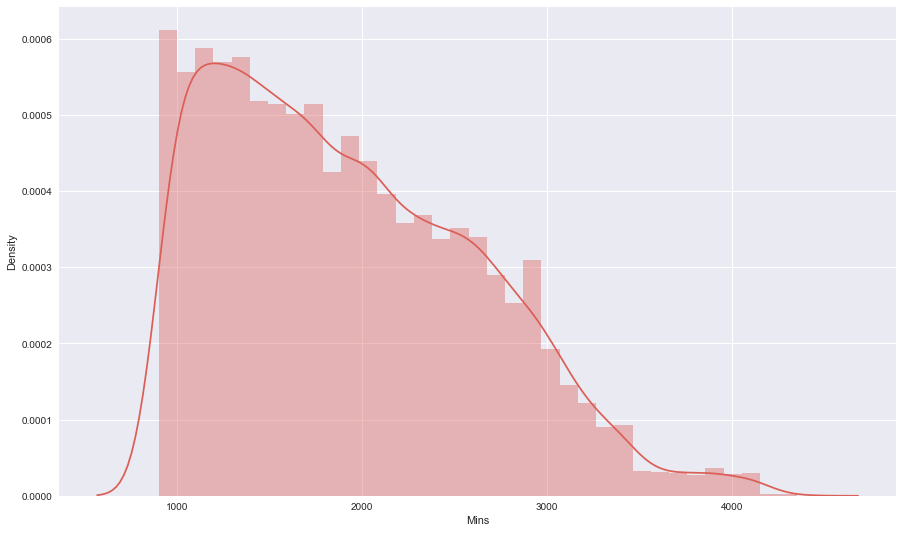

In [237]:
sns.distplot(df['Mins'])
plt.show()

In [238]:
df_scaled_train
pd.set_option('display.max_rows', 10 )

In [239]:
df_scaled_train[np.isnan(df_scaled_train) == True] = 0
df_scaled_test[np.isnan(df_scaled_test) == True] = 0

In [240]:
df_scaled_test

,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,-0.672800,2.755636,1.996003,2.487712,-0.097059,-0.164708,0.289162,1.031776,-0.130086,-0.276904,...,1.719558,-0.613786,0.069849,-0.154863,0.421382,-0.714479,0.122812,-0.156304,-0.286674,2.213061
1,0.286244,-0.221637,0.175744,0.287085,-0.097059,-0.625443,-0.314297,-0.112315,-0.130086,-0.276904,...,-0.352270,-0.613786,-0.299689,-0.027851,-0.403538,0.268369,-0.121773,-0.299676,-0.286674,-0.057208
2,-0.433039,-0.824986,-0.944415,-0.559310,-0.490437,-0.625443,-0.917755,-1.027587,-0.508608,-0.276904,...,0.856296,-0.085286,0.254618,0.480198,-1.390621,-0.134851,-0.198205,-0.314768,-0.286674,-1.288541
3,-0.433039,-0.454236,-0.244316,-0.390031,-0.097059,-0.625443,-0.540594,0.116503,-0.508608,-0.276904,...,-0.179618,-0.613786,0.439387,0.226174,-0.974636,0.085660,-0.152346,-0.292130,-0.286674,-1.134624
4,0.765767,-0.574060,-0.944415,0.456364,0.099630,5.824850,0.817188,-0.798769,0.248436,-0.276904,...,-1.042879,-0.613786,-1.223533,-0.789924,-0.086261,-0.071847,-0.213492,-0.012933,-0.286674,-1.211583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,2.204333,-0.184985,-0.664376,-0.051473,-0.883815,-0.625443,0.817188,-0.341133,2.141047,-0.276904,...,-0.006965,-0.613786,-0.669227,-1.297973,-2.187339,-4.595466,6.818320,5.910583,1.896618,-0.365042
2673,-0.912561,2.490613,-1.084435,-0.728589,-0.883815,-0.625443,-0.842323,-0.569951,-0.887130,-0.276904,...,-0.006965,0.971712,1.178463,2.258370,-0.495196,0.041558,-0.060627,-0.322314,-0.286674,0.673895
2674,-0.672800,-1.219700,0.175744,-0.559310,-0.097059,-0.625443,-0.993187,1.947048,-0.887130,-0.276904,...,-0.524922,-0.085286,-0.114920,0.353186,-0.600955,0.199066,0.015806,-0.307222,1.896618,1.674353
2675,-0.433039,1.412198,-0.804395,-0.897868,1.083075,-0.625443,-0.766891,0.116503,-0.130086,-0.276904,...,0.856296,2.557209,1.363232,2.385382,-1.298964,-0.286058,-0.198205,-0.329860,0.804972,-0.018729


In [241]:
#from sklearn.cluster import KMeans

#Find elbow point

#def change_n_clusters(n_clusters, data):
#    sum_of_squared_distance = []
#    for n_cluster in n_clusters:
#        kmeans = KMeans(n_clusters=n_cluster)
#        kmeans.fit(df_scaled)
#        sum_of_squared_distance.append(kmeans.inertia_)
        
#    plt.plot(n_clusters , sum_of_squared_distance , 'o')
#    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
#    plt.xlabel('Number of Clusters')
#    plt.ylabel('Cost')
    
#n_clusters = [2,3,4,5,6,7,8,9]
#change_n_clusters(n_clusters, df_scaled)


In [242]:
#모델에 대한 결과 확인 예시 코드 - train and test / 모델 = 42 / train-test = 13
from sklearn.cluster import KMeans

#----------------------------------------------------------------------
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기
#----------------------------------------------------------------------

k = 300 #k_means 파라미터 k 개수 -> 50 ~ 300

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled_train)

df_test_result = kmeans.predict(df_scaled_test)

result_by_sklearn = df_scaled_train.copy()
result_by_sklearn["cluster"] = kmeans.labels_

test_result = df_scaled_test.copy()
test_result["cluster"] = df_test_result

result_by_sklearn.head()

result_by_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8028 non-null   float64
 1   Mins      8028 non-null   float64
 2   Tackles   8028 non-null   float64
 3   Inter     8028 non-null   float64
 4   Fouls     8028 non-null   float64
 5   Offsides  8028 non-null   float64
 6   Clear     8028 non-null   float64
 7   Drb       8028 non-null   float64
 8   Blocks    8028 non-null   float64
 9   OwnG      8028 non-null   float64
 10  Goals     8028 non-null   float64
 11  Assists   8028 non-null   float64
 12  SpG       8028 non-null   float64
 13  KeyP      8028 non-null   float64
 14  Drb.1     8028 non-null   float64
 15  Fouled    8028 non-null   float64
 16  Off       8028 non-null   float64
 17  Disp      8028 non-null   float64
 18  UnsTch    8028 non-null   float64
 19  AvgP      8028 non-null   float64
 20  PS%       8028 non-null   floa

In [243]:
test_result

,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,...,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating,cluster
0,-0.672800,2.755636,1.996003,2.487712,-0.097059,-0.164708,0.289162,1.031776,-0.130086,-0.276904,...,-0.613786,0.069849,-0.154863,0.421382,-0.714479,0.122812,-0.156304,-0.286674,2.213061,260
1,0.286244,-0.221637,0.175744,0.287085,-0.097059,-0.625443,-0.314297,-0.112315,-0.130086,-0.276904,...,-0.613786,-0.299689,-0.027851,-0.403538,0.268369,-0.121773,-0.299676,-0.286674,-0.057208,72
2,-0.433039,-0.824986,-0.944415,-0.559310,-0.490437,-0.625443,-0.917755,-1.027587,-0.508608,-0.276904,...,-0.085286,0.254618,0.480198,-1.390621,-0.134851,-0.198205,-0.314768,-0.286674,-1.288541,252
3,-0.433039,-0.454236,-0.244316,-0.390031,-0.097059,-0.625443,-0.540594,0.116503,-0.508608,-0.276904,...,-0.613786,0.439387,0.226174,-0.974636,0.085660,-0.152346,-0.292130,-0.286674,-1.134624,184
4,0.765767,-0.574060,-0.944415,0.456364,0.099630,5.824850,0.817188,-0.798769,0.248436,-0.276904,...,-0.613786,-1.223533,-0.789924,-0.086261,-0.071847,-0.213492,-0.012933,-0.286674,-1.211583,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,2.204333,-0.184985,-0.664376,-0.051473,-0.883815,-0.625443,0.817188,-0.341133,2.141047,-0.276904,...,-0.613786,-0.669227,-1.297973,-2.187339,-4.595466,6.818320,5.910583,1.896618,-0.365042,258
2673,-0.912561,2.490613,-1.084435,-0.728589,-0.883815,-0.625443,-0.842323,-0.569951,-0.887130,-0.276904,...,0.971712,1.178463,2.258370,-0.495196,0.041558,-0.060627,-0.322314,-0.286674,0.673895,218
2674,-0.672800,-1.219700,0.175744,-0.559310,-0.097059,-0.625443,-0.993187,1.947048,-0.887130,-0.276904,...,-0.085286,-0.114920,0.353186,-0.600955,0.199066,0.015806,-0.307222,1.896618,1.674353,117
2675,-0.433039,1.412198,-0.804395,-0.897868,1.083075,-0.625443,-0.766891,0.116503,-0.130086,-0.276904,...,2.557209,1.363232,2.385382,-1.298964,-0.286058,-0.198205,-0.329860,0.804972,-0.018729,70


In [244]:
result_by_sklearn.head()

,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,...,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating,cluster
0,0.707441,0.588623,-1.658322,-1.403948,-1.878565,-0.633029,-0.491676,-1.501167,-0.908068,-0.267079,...,-0.627996,-1.206531,-1.403733,0.482168,-0.522450,-0.200179,0.292857,-0.288183,-0.342049,28
1,0.014360,0.260980,-0.242963,1.577682,-1.090236,2.018196,2.672478,-0.104770,3.165574,3.294567,...,-0.627996,-1.020340,-0.639575,0.412607,0.523022,-0.200179,-0.123544,-0.288183,0.042956,285
2,-0.216667,0.751032,0.181645,0.749452,0.289339,-0.191158,-0.418091,0.127962,-0.537737,-0.267079,...,-0.110755,1.213953,0.379303,0.969100,0.529639,0.101319,-0.139873,-0.288183,1.313470,296
3,-0.678721,-1.298150,-0.809107,-0.907009,0.289339,-0.633029,-0.565260,1.524359,-0.537737,-0.267079,...,2.475451,-0.089385,0.634022,-1.201223,-0.178371,-0.099680,-0.295003,-0.288183,-1.227558,40
4,-0.678721,-0.450797,-0.242963,-0.410071,-0.893154,-0.633029,-0.786015,0.360695,-0.537737,-0.267079,...,-0.627996,0.096806,0.379303,-0.644730,0.384067,-0.116429,-0.254179,1.816944,-0.650052,68


In [245]:
df_sub.reset_index(drop=True , inplace=True)
df_sub_test.reset_index(drop=True , inplace=True)
df_sub.info()
df_sub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  8028 non-null   object
 1   league  8028 non-null   object
 2   name    8028 non-null   object
 3   Apps    8028 non-null   object
dtypes: object(4)
memory usage: 251.0+ KB


,season,league,name,Apps
0,2019-2020,Eredivisie,Sergio Padt FC Groningen,26
1,2019,USA,Doneil Henry Vancouver,24(1)
2,2020-2021,RussiaPremier,Roman Zobnin Spartak Moscow,28
3,2019-2020,Eredivisie,Vito van Crooij PEC Zwolle,11(5)
4,2019-2020,PremierLeague,Alex Iwobi Everton,19(6)
...,...,...,...,...
8023,2019-2020,LeagueOne,Brandon Hanlan Gillingham,31(4)
8024,2019-2020,LigaProfesional,Juan Méndez Talleres,13(2)
8025,2020-2021,PremierLeague,Danny Ings Southampton,26(3)
8026,2019-2020,ItalySerieA,Arkadiusz Milik Napoli,19(7)


In [246]:
#----------------------------------------------------------------------
#To-do
#1. 이 클러스터는 어떤선수들이 모였나
#2. 클러스터에 있는 선수들 feature 값 출력해보기
#시나리오 1. 특출난 선수급의 활약을 보여주는 유명하지 않은 선수
#시나리오 2. 팀의 주전급 선수가 이탈하게 되어 대신할 선수 찾기

#To-do option
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기

#-----------------------------------------------------------------------

#google 검색 : soccer scout process -> 축구 스카우팅 과정들이 나와있음 나중에 보고서 쓸 때 활용해도 될듯

#실제 스카우팅 과정에서 사용 = 각 축구 클럽은 해당 클럽에 속한 나라에 스카우팅 본사를 둔다
#이후 각 나라에 스카우터들을 파견하고 현지 스카우터는 그 나라에 머무르면서 스카우팅을 지속적으로 진행한다.
#모든 나라에 스카우터들을 보낼 수 없으므로 이 과정속에서 놓치는 나라와 그 나라의 선수들이 존재한다.
#이 부분에서 그 나라의 선수들의 데이터를 수집할 수 있다면 이러한 모델이 시나리오상 도움이 될 수 있다.
#현지 스카우터를 파견하지 않고서도 현지 스카우터를 파견한 것과 같은 효과를 낼 수 있을 수 있다.
#----------------------------------------------------------------------

In [247]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

df_c = result_by_sklearn[['cluster']]
df_c.reset_index(drop=True , inplace=True)

df_cluster = pd.concat([df_sub, df_c], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = df_cluster.index[df_cluster['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(df_cluster.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0

for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(df_cluster.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(df_cluster.loc[(df_cluster['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1


살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : d
[]


In [251]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

pd.set_option('display.max_rows', None)

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster[df_cluster['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 191
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 191
         season               league                           name    Apps  \
208   2020-2021            LeagueTwo           Alfie May Cheltenham   36(8)   
306   2019-2020         Championship            Harry Cornick Luton   37(8)   
905   2020-2021               LaLiga            Roger Martí Levante   26(7)   
999   2020-2021        PremierLeague          Che Adams Southampton   30(6)   
1459  2020-2021         Championship          Steven Fletcher Stoke   30(7)   
1511  2020-2021            LeagueTwo           Jamie Reid Mansfield   31(8)   
1670       2019               Brazil        Eduardo Sasha Santos FC   34(3)   
2189  2020-2021               Ligue1              Boulaye Dia Reims   35(1)   
2571  2019-2020  RussiaPremierLeague       Fedor Chalov CSKA Moscow   29(1)   
2604  2020-2021            LeagueTwo      Lewis Alessandra Carlisle   38(8)   
2903 

In [249]:
#해당 클러스터에 속하는 선수들 전체 확인 - test

pd.set_option('display.max_rows', None)
    
df_c_test = test_result[['cluster']]
df_c_test.reset_index(drop=True , inplace=True)

df_cluster_test = pd.concat([df_sub_test, df_c_test], axis = 1)
#df_cluster

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster_test[df_cluster_test['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 1
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 1
         season     league                               name   Apps  cluster
158   2019-2020  LeagueOne       Armand Gnanduillet Blackpool  25(5)        1
728   2019-2020   SuperLig  Enzo Crivelli Istanbul Basaksehir  29(1)        1
1781  2020-2021     LaLiga            Joselu Deportivo Alaves  34(3)        1
1917  2020-2021  LeagueOne            Colby Bishop Accrington  38(3)        1
1925  2020-2021  LeagueTwo          Jamille Matt Forest Green  33(4)        1
---------------------------------------------------------------------------------


In [250]:
print(df_cluster_test[df_cluster_test["name"] == "Neal Maupay Brighton"]) # 2019-2020

         season         league                  name   Apps  cluster
641   2020-2021  PremierLeague  Neal Maupay Brighton  29(4)      191
1977  2019-2020  PremierLeague  Neal Maupay Brighton  30(7)      191


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


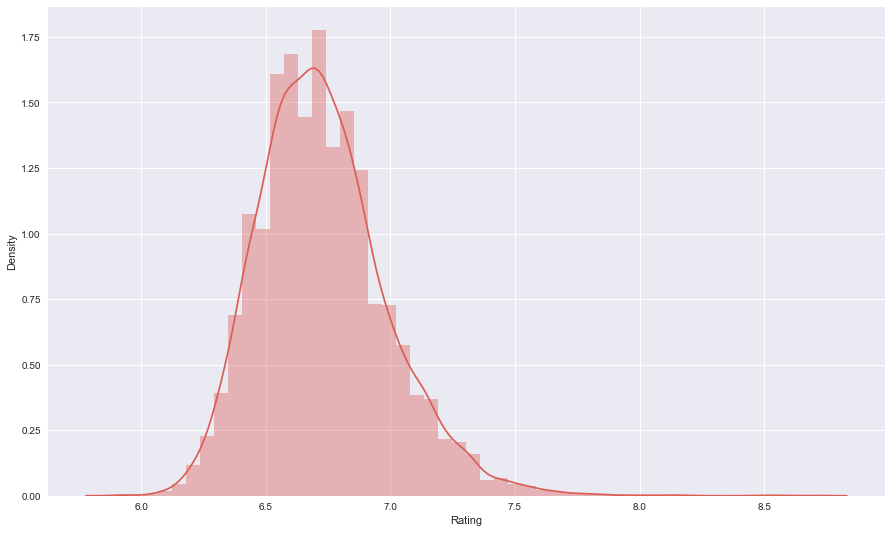

In [22]:
#아래로는 시각화 및 2차 데이터 분석
#--------------------------------------------------------------------------------

#아웃라이어의 기준 => Mins가 특정 값 이하인 선수
#즉 , 표본이 적어 평균적인 수치를 확인하기 어려운 선수

#특별한 선수들은 아웃라이어가 아닌 특정 지표의 기준이 될 수 있다.

#아웃라이어의 기준? => 기본으로 생각하면 Rating 그렇다면 Rating을 기준으로 아웃라이어 체크? 가능은하다.
#혹은 비전문가들의 눈으로 살펴보는 특정 지표를 통한 아웃라이어 검출 , 이를 통해서 기준점 생각 가능

#그런데 특정 아웃라이어 즉 특별한 선수들이 클러스터링 되지 못하는 상황이 생긴다? 그렇다면 k-mean에서 이 선수들을
#다 포함할 수 있을 때까지 돌린다는 마인드

sns.distplot(df['Rating'])
plt.show()


In [23]:
df_last.reset_index(drop=True , inplace=True)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    10705 non-null  object 
 1   league    10705 non-null  object 
 2   name      10705 non-null  object 
 3   age       10705 non-null  int64  
 4   Apps      10705 non-null  object 
 5   Mins      10705 non-null  int64  
 6   Tackles   10705 non-null  float64
 7   Inter     10705 non-null  float64
 8   Fouls     10705 non-null  float64
 9   Offsides  10705 non-null  float64
 10  Clear     10705 non-null  float64
 11  Drb       10705 non-null  float64
 12  Blocks    10705 non-null  float64
 13  OwnG      10705 non-null  int64  
 14  Goals     10705 non-null  int64  
 15  Assists   10705 non-null  int64  
 16  SpG       10705 non-null  float64
 17  KeyP      10705 non-null  float64
 18  Drb.1     10705 non-null  float64
 19  Fouled    10705 non-null  float64
 20  Off       10705 non-null  fl

In [25]:
df_merge = pd.concat([df_last, df_cluster["cluster"]], axis = 1)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    10705 non-null  object 
 1   league    10705 non-null  object 
 2   name      10705 non-null  object 
 3   age       10705 non-null  int64  
 4   Apps      10705 non-null  object 
 5   Mins      10705 non-null  int64  
 6   Tackles   10705 non-null  float64
 7   Inter     10705 non-null  float64
 8   Fouls     10705 non-null  float64
 9   Offsides  10705 non-null  float64
 10  Clear     10705 non-null  float64
 11  Drb       10705 non-null  float64
 12  Blocks    10705 non-null  float64
 13  OwnG      10705 non-null  int64  
 14  Goals     10705 non-null  int64  
 15  Assists   10705 non-null  int64  
 16  SpG       10705 non-null  float64
 17  KeyP      10705 non-null  float64
 18  Drb.1     10705 non-null  float64
 19  Fouled    10705 non-null  float64
 20  Off       10705 non-null  fl

In [26]:
q1=df_merge['Rating'].quantile(0.25)
q2=df_merge['Rating'].quantile(0.5)
q3=df_merge['Rating'].quantile(0.75)
iqr=q3-q1
iqr

0.33000000000000007

In [27]:
rating_outs=df_merge['Rating']>q3+1.5*iqr
df_outs = df_merge[rating_outs]
a=df_merge[rating_outs].index
print(a)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10078, 10079, 10080, 10438, 10439, 10440, 10441, 10442, 10443,
            10444],
           dtype='int64', length=168)


In [28]:
a = list(a)
for i in a:
    name = df_merge.iloc[i,2]
    print(name , end=" / ")
    print(df_merge.iloc[i,0])


Cristiano Ronaldo Juventus / 2019-2020
Josip Ilicic Atalanta / 2019-2020
Ciro Immobile Lazio / 2019-2020
Luis Alberto Lazio / 2019-2020
Papu Gómez Atalanta / 2019-2020
Zlatan Ibrahimovic AC Milan / 2019-2020
Edin Dzeko Roma / 2019-2020
Domenico Berardi Sassuolo / 2019-2020
Paulo Dybala Juventus / 2019-2020
Duván Zapata Atalanta / 2019-2020
Cristiano Ronaldo Juventus / 2020-2021
Zlatan Ibrahimovic AC Milan / 2020-2021
Lorenzo Insigne Napoli / 2020-2021
Romelu Lukaku Inter / 2020-2021
Domenico Berardi Sassuolo / 2020-2021
Rodrigo de Paul Udinese / 2020-2021
Adam Ounas Crotone / 2020-2021
Ignacio Fernández River Plate / 2019-2020
Nicolás Giménez Arsenal Sarandi / 2019-2020
Marcelino Moreno Lanus / 2019-2020
Julián Álvarez River Plate / 2020-2021
Enzo Díaz Talleres / 2020-2021
Martín Ojeda Godoy Cruz / 2020-2021
Emiliano Vecchio Rosario Central / 2020-2021
Diego Valoyes Talleres / 2020-2021
José López Lanus / 2020-2021
Cesar Ibañez Huracan / 2020-2021
Marco Ruben Rosario Central / 2020-202

In [36]:
df_merge.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64


In [37]:
pd.set_option('display.max_rows', 10 )
df_merge

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,2019-2020,USA,Bradley Wright-Phillips New York,36.0,9(16),1135.0,1.8,6.27,0.3,0.1,...,0.9,0.6,0.9,0.5,12.8,64.7,0.0,0.0,0.0,200
9026,2019-2020,USA,Saad Abdul-Salaam Seattle,30.0,11(7),1062.0,0.8,6.26,0.5,0.7,...,0.4,0.1,0.4,0.4,26.3,78.9,0.1,1.2,0.0,115
9027,2019-2020,USA,Przemyslaw Tyton FC Cincinnati,34.0,15,1350.0,0.0,6.24,0.0,0.1,...,0.1,0.0,0.0,0.0,27.6,61.1,0.0,7.4,0.0,203
9028,2019-2020,USA,Caleb Stanko FC Cincinnati,28.0,16(7),1438.0,0.9,6.19,1.4,0.5,...,0.8,0.0,0.4,0.3,28.9,84.5,0.0,2.6,0.0,133


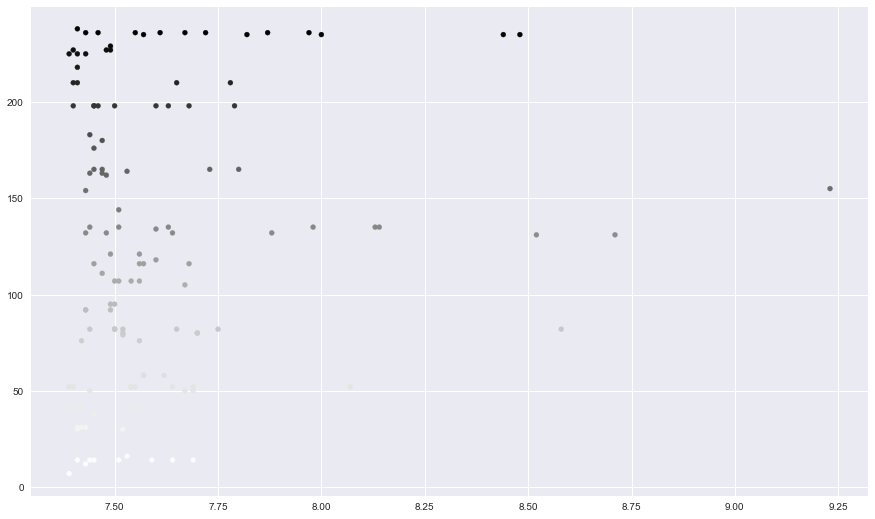

In [38]:
plt.scatter(df_outs["Rating"], df_outs["cluster"], s=25, c=df_outs["cluster"])
plt.show()

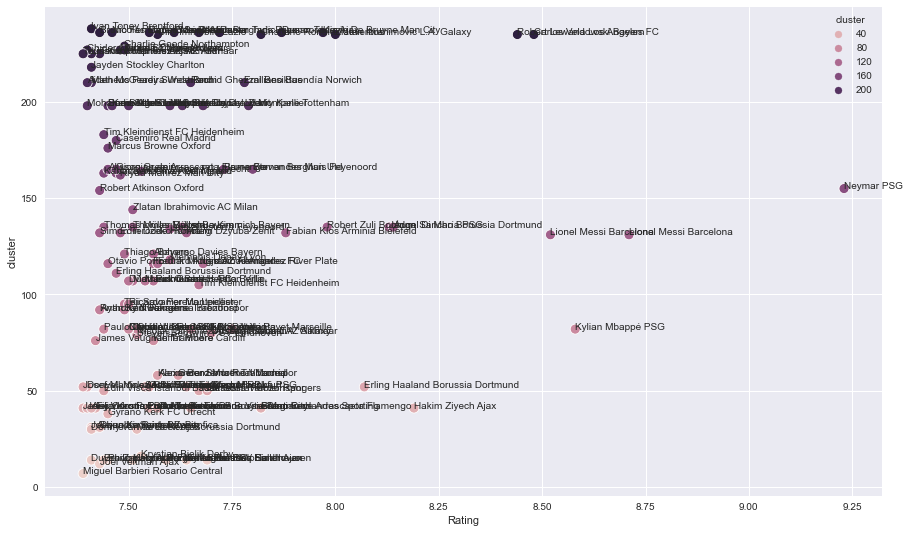

In [39]:
sns.scatterplot(x='Rating', 
                y='cluster', 
                hue='cluster',
                s=100, 
                data=df_outs)

for i,k,p in zip(df_outs["Rating"],df_outs["cluster"],df_outs["name"]):
    plt.text(i, k, p)
    

plt.show()

#결과는 nan 값 즉 아웃츠 중에 분류가 안된 녀석들 뺴고는 다 나옴 / 전체 아웃츠가 포함되도록 세팅해서 돌려보면 괜찮을 듯
#이후 결과 검증은 이름나지 않은 선수들이 현재 시즌에 어떤 팀으로 옮겼나 혹은 퍼포먼스? 이건 너무 간거 갔기도 함


#다듬거나 생각해야할 부분들

#1. 시각화 부분에서는 좀더 다듬어야할 필요가 보이긴 함
#2. 현재는 나쁜 지표까지도 포함해서 클러스터링을 하고 있다. 최고의 선수들과 함께 클러스터링 되는 것을 보는 관점이라면
#굳이 나쁜 것까지 생각해야하나? 그렇게 생각하면 나쁜 지표에서 탑을 달리는 선수들이 아웃라이어에 포함되는 것이 아닌가?
#3. 위에 대한 답으로는 일정 rating 이상을 보도록 하면 될 듯하다.

#아무튼 결론적으로 절대 어느 클러스터에도 속하지 않으려는 튀는 값들 즉 성적이 뛰어난 선수들을 어떻게든 분리하는게 목적이라면
#k의 개수를 많이 늘리는 것이 절대적으로 좋다? 라는 물음에 대해 고민해야함